In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np


In [3]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values to [0,1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten label arrays
y_train, y_test = y_train.flatten(), y_test.flatten()

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_split=0.1,
    batch_size=64
)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 59s 81ms/step - accuracy: 0.3336 - loss: 1.8015 - val_accuracy: 0.5318 - val_loss: 1.3188
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 83s 82ms/step - accuracy: 0.5363 - loss: 1.2920 - val_accuracy: 0.6046 - val_loss: 1.1160
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.6162 - loss: 1.0788 - val_accuracy: 0.6450 - val_loss: 1.0137
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 59s 84ms/step - accuracy: 0.6594 - loss: 0.9672 - val_accuracy: 0.6682 - val_loss: 0.9369
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 78s 79ms/step - accuracy: 0.6904 - loss: 0.8798 - val_accuracy: 0.6708 - val_loss: 0.9452
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 57s 81ms/step - accuracy: 0.7151 - loss: 0.8154 - val_accuracy: 0.7058 - val_loss: 0.8578
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 57s 81ms/step - accuracy: 0.7300 - loss: 0.7662 - val_accuracy: 0.7168 - val_loss: 0.8132
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.7525 - loss: 0.7057 - 

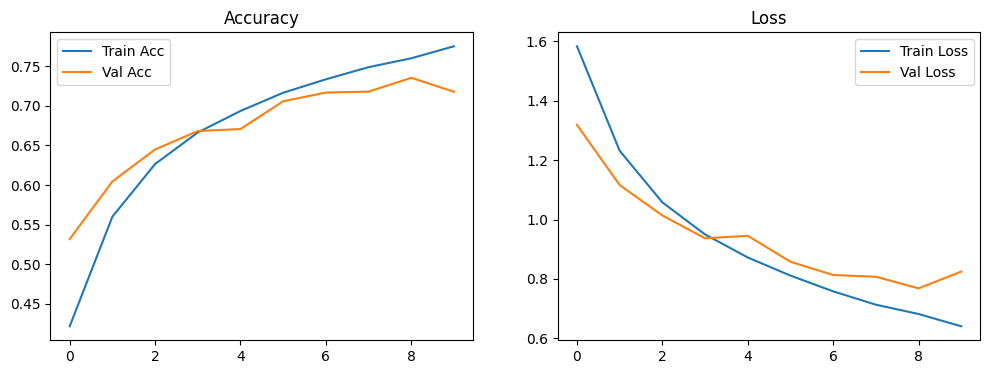

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.3f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6974 - loss: 0.8834
Test Accuracy: 0.692


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
              precision    recall  f1-score   support

    airplane       0.83      0.64      0.72      1000
  automobile       0.83      0.83      0.83      1000
        bird       0.63      0.52      0.57      1000
         cat       0.43      0.62      0.51      1000
        deer       0.76      0.53      0.62      1000
         dog       0.55      0.66      0.60      1000
        frog       0.78      0.76      0.77      1000
       horse       0.75      0.73      0.74      1000
        ship       0.84      0.80      0.82      1000
       truck       0.72      0.84      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.69     10000
weighted avg       0.71      0.69      0.69     10000



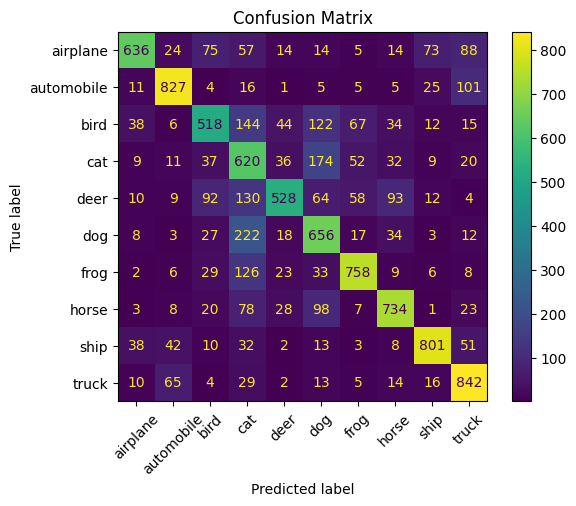

In [9]:
y_pred = np.argmax(model.predict(X_test), axis=1)

print(classification_report(y_test, y_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=class_names).plot(xticks_rotation=45)
plt.title('Confusion Matrix')
plt.show()

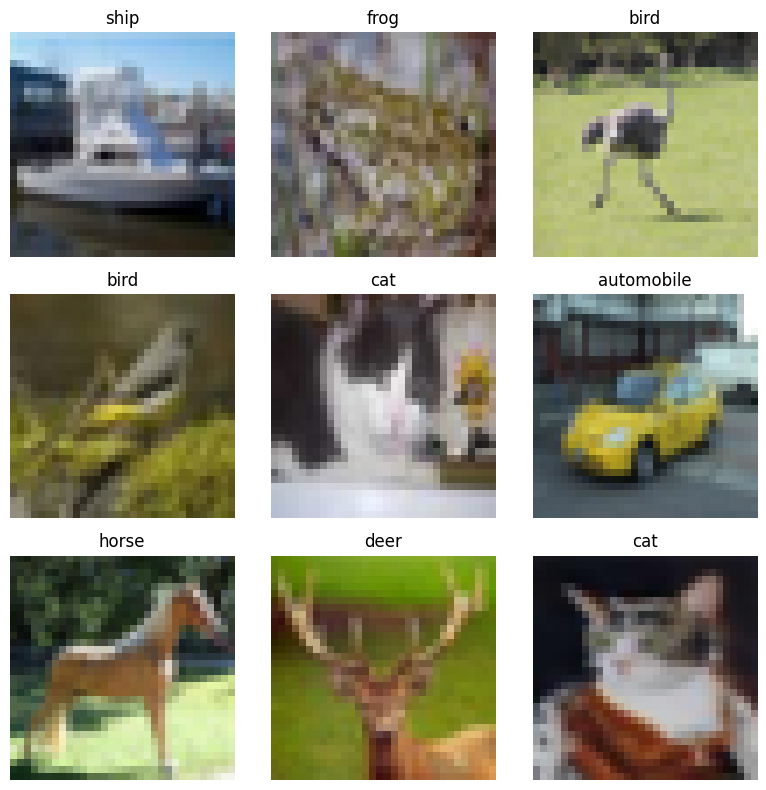

In [17]:
indices = np.random.choice(len(X_test), 9)
images, labels = X_test[indices], y_pred[indices]

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title(class_names[labels[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()